In [279]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp
import seaborn as sns

# Input data files are available in the "../input/" directory.

import os

In [280]:
data = pd.read_excel("C:\\Users\\Admin\\Desktop\\machine_learning\\Sample - Superstore.xls", encoding = "unicode_escape")

In [281]:
furniture = data.loc[data['Category'] == 'Furniture']
office = data.loc[data['Category'] == 'Office Supplies']

In [282]:
furniture.shape,office.shape

((2121, 21), (6026, 21))

In [283]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [284]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)

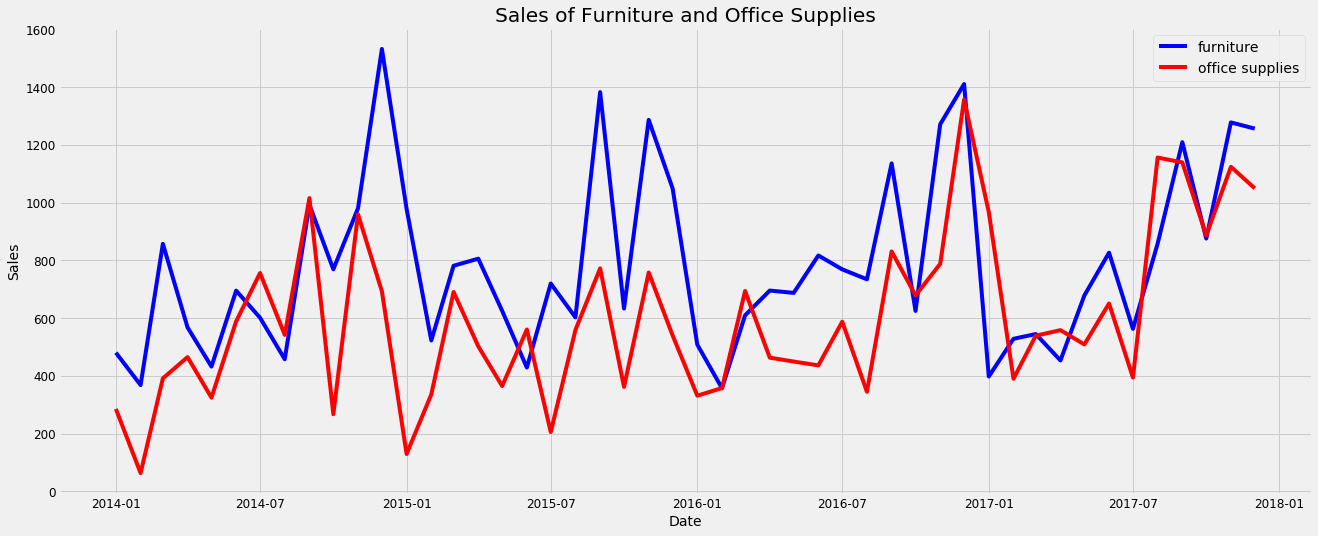

In [285]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [286]:
from fbprophet import Prophet

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet()
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet()
office_model.fit(office) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [287]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)


<Figure size 1296x432 with 0 Axes>

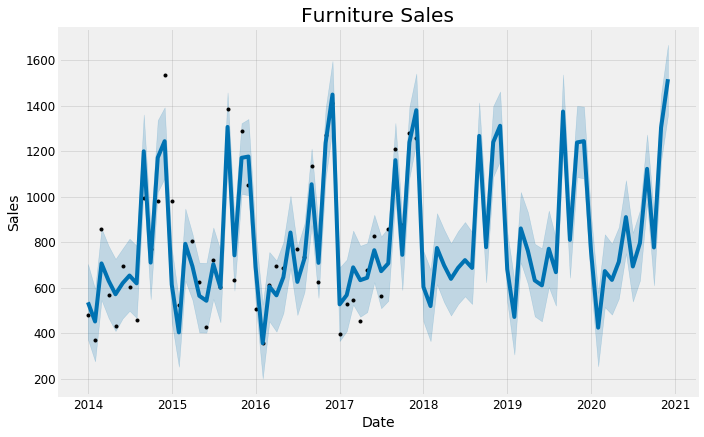

In [288]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

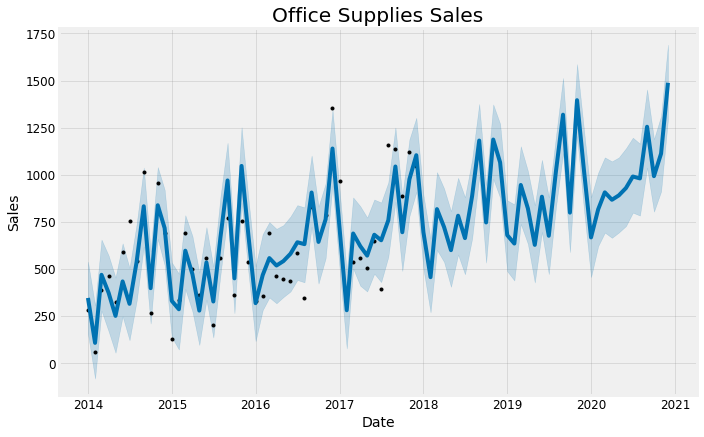

In [289]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [290]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')

forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


forecast




,Date,furniture_trend,furniture_trend_lower,furniture_trend_upper,furniture_yhat_lower,furniture_yhat_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_yhat,office_trend,office_trend_lower,office_trend_upper,office_yhat_lower,office_yhat_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_yhat
0,2014-01-01,726.057713,726.057713,726.057713,372.312121,703.678392,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,-190.685662,-190.685662,-190.685662,535.372051,487.530759,487.530759,487.530759,157.177364,539.682266,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,-140.040481,-140.040481,-140.040481,347.490278
1,2014-02-01,727.494023,727.494023,727.494023,276.031663,593.436804,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,-276.377703,-276.377703,-276.377703,451.116320,494.918445,494.918445,494.918445,-80.309811,307.434454,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,-385.678283,-385.678283,-385.678283,109.240162
2,2014-03-01,728.791335,728.791335,728.791335,545.766421,859.908759,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,-22.389755,-22.389755,-22.389755,706.401580,501.591193,501.591193,501.591193,279.606848,656.632985,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,-31.379844,-31.379844,-31.379844,470.211349
3,2014-04-01,730.227645,730.227645,730.227645,466.290616,783.186929,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,-100.141158,-100.141158,-100.141158,630.086487,508.978878,508.978878,508.978878,170.661522,572.311197,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,-134.291690,-134.291690,-134.291690,374.687188
4,2014-05-01,731.617622,731.617622,731.617622,409.223610,725.956681,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,-160.815662,-160.815662,-160.815662,570.801960,516.128251,516.128251,516.128251,57.187919,455.358313,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,-263.821569,-263.821569,-263.821569,252.306682
5,2014-06-01,733.053932,733.053932,733.053932,464.611265,771.822804,-113.832366,-113.832366,-113.832366,0.0,0.0,0.0,-113.832366,-113.832366,-113.832366,619.221566,523.515936,523.515936,523.515936,249.966792,636.791468,-88.341183,-88.341183,-88.341183,0.0,0.0,0.0,-88.341183,-88.341183,-88.341183,435.174753
6,2014-07-01,734.443909,734.443909,734.443909,498.229766,815.023849,-81.335686,-81.335686,-81.335686,0.0,0.0,0.0,-81.335686,-81.335686,-81.335686,653.108224,530.665309,530.665309,530.665309,123.420447,506.422396,-214.472082,-214.472082,-214.472082,0.0,0.0,0.0,-214.472082,-214.472082,-214.472082,316.193227
7,2014-08-01,735.880219,735.880219,735.880219,466.671284,783.699225,-117.154950,-117.154950,-117.154950,0.0,0.0,0.0,-117.154950,-117.154950,-117.154950,618.725269,538.052994,538.052994,538.052994,331.713090,738.969845,0.771674,0.771674,0.771674,0.0,0.0,0.0,0.771674,0.771674,0.771674,538.824669
8,2014-09-01,737.316529,737.316529,737.316529,1035.316224,1360.513804,461.565905,461.565905,461.565905,0.0,0.0,0.0,461.565905,461.565905,461.565905,1198.882434,545.440679,545.440679,545.440679,620.376166,1038.805466,288.232173,288.232173,288.232173,0.0,0.0,0.0,288.232173,288.232173,288.232173,833.672852
9,2014-10-01,738.706506,738.706506,738.706506,549.136382,865.122040,-28.820414,-28.820414,-28.820414,0.0,0.0,0.0,-28.820414,-28.820414,-28.820414,709.886092,552.590052,552.590052,552.590052,211.599102,594.247616,-153.268090,-153.268090,-153.268090,0.0,0.0,0.0,-153.268090,-153.268090,-153.268090,399.321962


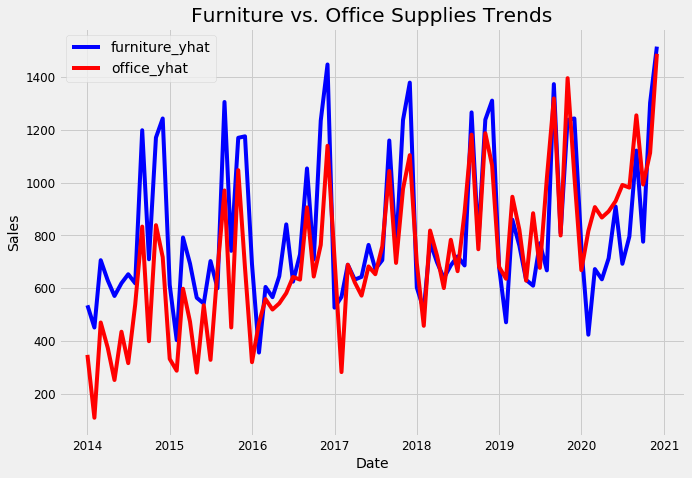

In [291]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Trends');

In [292]:
#k=forecast['furniture_trend']forecast['furniture_trend'][forecast['Date'] ='2017-01-01']
#print(k)

In [293]:
#y_forecasted = forecast.predicted_mean
#y_truth = furniture['2017-01-01':]
##print(type(y_forecasted),type(y_truth))
#furniture
# Compute the mean square error
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

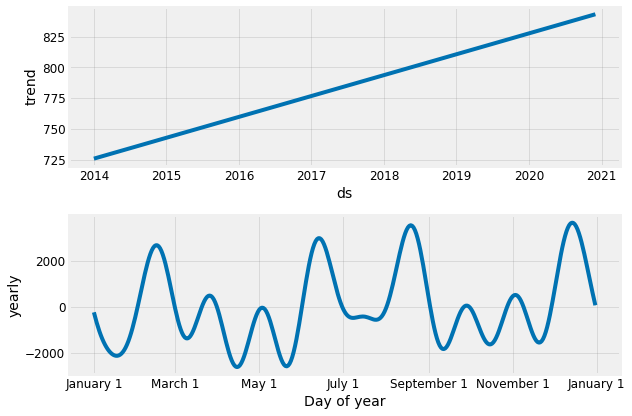

In [294]:
furniture_model.plot_components(furniture_forecast);

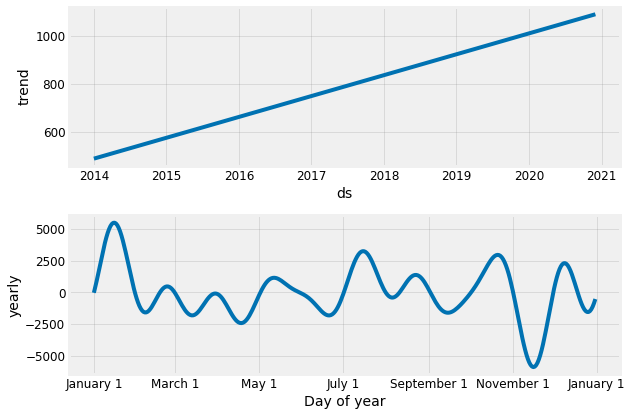

In [295]:
office_model.plot_components(office_forecast);

In [296]:
forecast.columns

Index(['Date', 'furniture_trend', 'furniture_trend_lower',
       'furniture_trend_upper', 'furniture_yhat_lower', 'furniture_yhat_upper',
       'furniture_additive_terms', 'furniture_additive_terms_lower',
       'furniture_additive_terms_upper', 'furniture_multiplicative_terms',
       'furniture_multiplicative_terms_lower',
       'furniture_multiplicative_terms_upper', 'furniture_yearly',
       'furniture_yearly_lower', 'furniture_yearly_upper', 'furniture_yhat',
       'office_trend', 'office_trend_lower', 'office_trend_upper',
       'office_yhat_lower', 'office_yhat_upper', 'office_additive_terms',
       'office_additive_terms_lower', 'office_additive_terms_upper',
       'office_multiplicative_terms', 'office_multiplicative_terms_lower',
       'office_multiplicative_terms_upper', 'office_yearly',
       'office_yearly_lower', 'office_yearly_upper', 'office_yhat'],
      dtype='object')

In [317]:
forecast

,Date,furniture_trend,furniture_trend_lower,furniture_trend_upper,furniture_yhat_lower,furniture_yhat_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_yhat,office_trend,office_trend_lower,office_trend_upper,office_yhat_lower,office_yhat_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_yhat
0,2014-01-01,726.057713,726.057713,726.057713,372.312121,703.678392,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,-190.685662,-190.685662,-190.685662,535.372051,487.530759,487.530759,487.530759,157.177364,539.682266,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,-140.040481,-140.040481,-140.040481,347.490278
1,2014-02-01,727.494023,727.494023,727.494023,276.031663,593.436804,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,-276.377703,-276.377703,-276.377703,451.116320,494.918445,494.918445,494.918445,-80.309811,307.434454,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,-385.678283,-385.678283,-385.678283,109.240162
2,2014-03-01,728.791335,728.791335,728.791335,545.766421,859.908759,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,-22.389755,-22.389755,-22.389755,706.401580,501.591193,501.591193,501.591193,279.606848,656.632985,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,-31.379844,-31.379844,-31.379844,470.211349
3,2014-04-01,730.227645,730.227645,730.227645,466.290616,783.186929,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,-100.141158,-100.141158,-100.141158,630.086487,508.978878,508.978878,508.978878,170.661522,572.311197,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,-134.291690,-134.291690,-134.291690,374.687188
4,2014-05-01,731.617622,731.617622,731.617622,409.223610,725.956681,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,-160.815662,-160.815662,-160.815662,570.801960,516.128251,516.128251,516.128251,57.187919,455.358313,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,-263.821569,-263.821569,-263.821569,252.306682
5,2014-06-01,733.053932,733.053932,733.053932,464.611265,771.822804,-113.832366,-113.832366,-113.832366,0.0,0.0,0.0,-113.832366,-113.832366,-113.832366,619.221566,523.515936,523.515936,523.515936,249.966792,636.791468,-88.341183,-88.341183,-88.341183,0.0,0.0,0.0,-88.341183,-88.341183,-88.341183,435.174753
6,2014-07-01,734.443909,734.443909,734.443909,498.229766,815.023849,-81.335686,-81.335686,-81.335686,0.0,0.0,0.0,-81.335686,-81.335686,-81.335686,653.108224,530.665309,530.665309,530.665309,123.420447,506.422396,-214.472082,-214.472082,-214.472082,0.0,0.0,0.0,-214.472082,-214.472082,-214.472082,316.193227
7,2014-08-01,735.880219,735.880219,735.880219,466.671284,783.699225,-117.154950,-117.154950,-117.154950,0.0,0.0,0.0,-117.154950,-117.154950,-117.154950,618.725269,538.052994,538.052994,538.052994,331.713090,738.969845,0.771674,0.771674,0.771674,0.0,0.0,0.0,0.771674,0.771674,0.771674,538.824669
8,2014-09-01,737.316529,737.316529,737.316529,1035.316224,1360.513804,461.565905,461.565905,461.565905,0.0,0.0,0.0,461.565905,461.565905,461.565905,1198.882434,545.440679,545.440679,545.440679,620.376166,1038.805466,288.232173,288.232173,288.232173,0.0,0.0,0.0,288.232173,288.232173,288.232173,833.672852
9,2014-10-01,738.706506,738.706506,738.706506,549.136382,865.122040,-28.820414,-28.820414,-28.820414,0.0,0.0,0.0,-28.820414,-28.820414,-28.820414,709.886092,552.590052,552.590052,552.590052,211.599102,594.247616,-153.268090,-153.268090,-153.268090,0.0,0.0,0.0,-153.268090,-153.268090,-153.268090,399.321962


In [375]:
k=forecast.loc[(forecast['Date']>='2017-01-01') & (forecast['Date'] <'2018-01-01')]


In [376]:
predicted_furniture=k['furniture_trend_upper']- k['furniture_trend_lower']

In [377]:
actual_furniture=k['furniture_trend']

In [378]:
mse_furniture=((predicted_furniture-actual_furniture)**2).mean()
print('The Mean Squared Error of our forecasts of furniture is',mse_furniture)


The Mean Squared Error of our forecasts of furniture is 615546.4254628085


In [379]:
rmse_furniture=round(np.sqrt(mse_furniture), 2)

In [380]:
print('The Root Mean Squared Error of our forecasts of furniture is ',rmse_furniture )

The Root Mean Squared Error of our forecasts of furniture is  784.57


In [381]:
predicted_office=k['office_trend_upper']- k['office_trend_lower']

In [382]:
actual_office=k['office_trend']

In [383]:
mse_office=((predicted_office-actual_office)**2).mean()
print('The Mean Squared Error of our forecasts of office is',mse_office)

The Mean Squared Error of our forecasts of office is 622466.8379479991


In [384]:
rmse_office=round(np.sqrt(mse_office), 2)

In [385]:
print('The Root Mean Squared Error of our forecasts of office is ', rmse_office )

The Root Mean Squared Error of our forecasts of office is  788.97


In [388]:
rmse_prophet= (rmse_office +  rmse_furniture)/2
rmse_prophet

786.77